# Implementation of face recognition using neural net 

In [4]:
%matplotlib inline

In [5]:
import cv2
import numpy as np
import os
from skimage import io
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import offsetbox

from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier


/Users/arjun/opencv/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

Using TensorFlow backend.


#### Listing the path of all the images

In [7]:
DatasetPath = []
for i in os.listdir("orl_faces_small"):
    DatasetPath.append(os.path.join("orl_faces_small", i))

#### Reading each image and assigning respective labels

In [8]:
imageData = []
imageLabels = []

In [9]:
for i in DatasetPath:
    imgRead = io.imread(i,as_grey=True)
    imageData.append(imgRead)
    
    labelRead = int(os.path.split(i)[1].split("_")[0].replace("person", "")) - 1
    imageLabels.append(labelRead)

In [10]:
imageDataFin = imageData
c = np.array(imageData)

In [13]:
c.shape

(390, 112, 92)

#### Splitting Dataset into train and test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(np.array(imageDataFin),np.array(imageLabels), train_size=0.7, random_state = 20)

In [15]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [16]:
X_train.shape

(273, 112, 92)

In [17]:
X_test.shape

(117, 112, 92)

In [18]:
nb_classes = 40
y_train = np.array(y_train) 
y_test = np.array(y_test) 

In [19]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

#### Converting each 2d image into 1D vector

In [20]:
X_train = X_train.reshape(X_train.shape[0], 112*92)
X_test = X_test.reshape(X_test.shape[0], 112*92)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

#### Preprocessing -PCA

Plot of amount of variance explained vs pcs


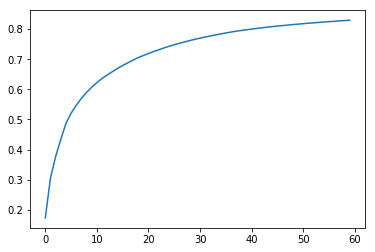

('Training PCA shape', (273, 60))
('Test PCA shape', (117, 60))
Eigen Faces


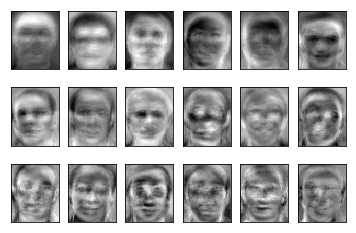

In [28]:
computed_pca = PCA(n_components = 60,whiten=True).fit(X_train)
XTr_pca = computed_pca.transform(X_train)

print("Plot of amount of variance explained vs pcs")
plt.plot(range(len(computed_pca.explained_variance_)),np.cumsum(computed_pca.explained_variance_ratio_))
plt.show()

XTs_pca = computed_pca.transform(X_test)
print("Training PCA shape",XTr_pca.shape)
print("Test PCA shape",XTs_pca.shape)


def plot_eigenfaces(images, h, w, rows=3, cols=6):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
plot_eigenfaces(computed_pca.components_,112,92)
print("Eigen Faces")

In [29]:
print("Original Training matrix shape", X_train.shape)
print("Original Testing matrix shape", X_test.shape)

('Original Training matrix shape', (273, 10304))
('Original Testing matrix shape', (117, 10304))


In [30]:
print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True).fit(XTr_pca, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 3.72206130
Validation score: 0.071429
Iteration 2, loss = 3.48632194
Validation score: 0.107143
Iteration 3, loss = 3.25522726
Validation score: 0.107143
Iteration 4, loss = 3.02872590
Validation score: 0.214286
Iteration 5, loss = 2.80701662
Validation score: 0.285714
Iteration 6, loss = 2.59029436
Validation score: 0.321429
Iteration 7, loss = 2.37908346
Validation score: 0.357143
Iteration 8, loss = 2.17403776
Validation score: 0.357143
Iteration 9, loss = 1.97594426
Validation score: 0.428571
Iteration 10, loss = 1.78561685
Validation score: 0.464286
Iteration 11, loss = 1.60412273
Validation score: 0.500000
Iteration 12, loss = 1.43238933
Validation score: 0.535714
Iteration 13, loss = 1.27128408
Validation score: 0.642857
Iteration 14, loss = 1.12161261
Validation score: 0.642857
Iteration 15, loss = 0.98381212
Validation score: 0.678571
Iteration 16, loss = 0.85823630
Validation score: 0.678571
Iteration 17, loss = 0

In [31]:
y_pred = clf.predict(XTs_pca)
#print(y_pred,y_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.67      0.50      0.57         4
          1       1.00      1.00      1.00         4
          2       1.00      1.00      1.00         5
          3       1.00      1.00      1.00         4
          4       1.00      1.00      1.00         2
          5       1.00      1.00      1.00         2
          6       1.00      1.00      1.00         3
          7       1.00      1.00      1.00         1
          8       1.00      1.00      1.00         3
          9       1.00      0.83      0.91         6
         10       0.80      1.00      0.89         4
         11       1.00      1.00      1.00         4
         12       1.00      1.00      1.00         4
         13       1.00      1.00      1.00         1
         14       0.33      1.00      0.50         1
         15       0.50      0.50      0.50         2
         16       1.00      1.00      1.00         2
         17       1.00      1.00      1.00   

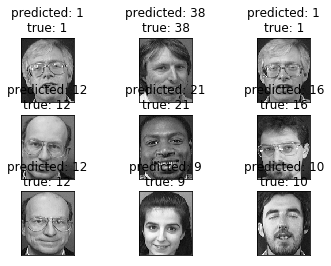

In [32]:
# Visualization
def plot_gallery(images, titles, h, w, rows=3, cols=3):
    plt.figure()
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
 
def titles(y_pred, y_test):
    for i in range(y_pred.shape[0]):
        pred_name = y_pred[i]
        true_name = y_test[i]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)
 
prediction_titles = list(titles(y_pred, y_test))
plot_gallery(X_test, prediction_titles, 112, 92)


#### Defining the model

In [36]:
model = Sequential()
model.add(Dense(512,input_shape=(XTr_pca.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               31232     
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 40)                20520     
__________

In [38]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

#### Training

In [39]:
model.fit(XTr_pca, Y_train, batch_size=256, epochs=50, verbose=1, validation_data=(XTs_pca, Y_test))

Train on 273 samples, validate on 117 samples
Epoch 1/50
273/273 [==============================] - 0s 2ms/step - loss: 3.7553 - acc: 0.0110 - val_loss: 3.5120 - val_acc: 0.1197
Epoch 2/50
273/273 [==============================] - 0s 102us/step - loss: 3.3895 - acc: 0.1722 - val_loss: 3.3587 - val_acc: 0.2991
Epoch 3/50
273/273 [==============================] - 0s 103us/step - loss: 3.1575 - acc: 0.3590 - val_loss: 3.2106 - val_acc: 0.3761
Epoch 4/50
273/273 [==============================] - 0s 104us/step - loss: 2.9273 - acc: 0.4945 - val_loss: 3.0482 - val_acc: 0.4872
Epoch 5/50
273/273 [==============================] - 0s 101us/step - loss: 2.6663 - acc: 0.6227 - val_loss: 2.8733 - val_acc: 0.5983
Epoch 6/50
273/273 [==============================] - 0s 103us/step - loss: 2.4331 - acc: 0.6923 - val_loss: 2.6907 - val_acc: 0.6496
Epoch 7/50
273/273 [==============================] - 0s 103us/step - loss: 2.1890 - acc: 0.7839 - val_loss: 2.4978 - val_acc: 0.7179
Epoch 8/50
273/273

#### Evaluating the performance

In [40]:
loss, accuracy = model.evaluate(XTs_pca,Y_test, verbose=0)

In [41]:
loss

0.26319836551307613

In [42]:
accuracy

0.94017094017094016

In [43]:
predicted_classes = model.predict_classes(XTs_pca)

In [44]:
correct_classified_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_classified_indices = np.nonzero(predicted_classes != y_test)[0]

In [45]:
correct_classified_indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  76,  77,  78,  79,  80,  81,
        82,  83,  85,  86,  87,  88,  89,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116])

In [46]:
incorrect_classified_indices

array([33, 46, 65, 75, 84, 90, 91])

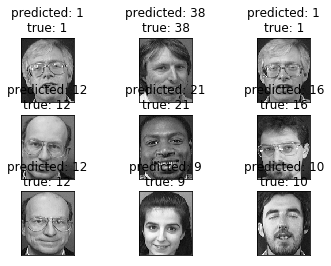

In [47]:
prediction_titles = list(titles(predicted_classes, y_test))
plot_gallery(X_test, prediction_titles, 112, 92)

